In [1]:
import pandas as pd

file_path = 'adult22.csv'
df = pd.read_csv(file_path)

selected_columns = ['ANGEV_A', 'FRJUICTP_A', 'COFFEENOTP_A', 'SALADTP_A', 'FRIESTP_A', 'BEANSTP_A', 'PIZZATP_A', 'OVEGTP_A']
df_selected = df[selected_columns]

df_selected = df_selected[~df_selected['ANGEV_A'].isin([7, 8, 9])]
df_selected = df_selected[~df_selected['FRJUICTP_A'].isin([7, 8, 9])]
df_selected = df_selected[~df_selected['COFFEENOTP_A'].isin([7, 8, 9])]
df_selected = df_selected[~df_selected['SALADTP_A'].isin([7, 8, 9])]
df_selected = df_selected[~df_selected['FRIESTP_A'].isin([7, 8, 9])]
df_selected = df_selected[~df_selected['BEANSTP_A'].isin([7, 8, 9])]
df_selected = df_selected[~df_selected['PIZZATP_A'].isin([7, 8, 9])]
df_selected = df_selected[~df_selected['OVEGTP_A'].isin([7, 8, 9])]

df_selected['ANGEV_A'].replace({2: 0}, inplace=True)
df_selected.replace({
    'FRJUICTP_A': {1: 3, 3: 1},
    'COFFEENOTP_A': {1: 3, 3: 1},
    'SALADTP_A': {1: 3, 3: 1},
    'FRIESTP_A': {1: 3, 3: 1},
    'BEANSTP_A': {1: 3, 3: 1},
    'PIZZATP_A': {1: 3, 3: 1},
    'OVEGTP_A': {1: 3, 3: 1},
}, inplace=True)

X = df_selected.drop(columns=['ANGEV_A'])
y = df_selected['ANGEV_A']

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix: {title}')
    plt.show()

def plot_feature_importance(importance_df, title):
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title(f'Feature Importance: {title}')
    plt.show()
    
    
def plot_kmeans_clusters(X_test, y_pred, title):
    plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred, cmap='viridis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'K-means Clusters: {title}')
    plt.show()

In [4]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

# Descriptive Statistics

In [5]:
print(df_selected.describe())

            ANGEV_A    FRJUICTP_A  COFFEENOTP_A     SALADTP_A     FRIESTP_A  \
count  26285.000000  26285.000000  26285.000000  26285.000000  26285.000000   
mean       0.019593      1.000647      1.213810      1.758874      1.229142   
std        0.138599      1.076954      1.300299      0.864899      0.795018   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      1.000000      1.000000   
50%        0.000000      1.000000      1.000000      2.000000      1.000000   
75%        0.000000      2.000000      3.000000      2.000000      2.000000   
max        1.000000      3.000000      3.000000      3.000000      3.000000   

          BEANSTP_A     PIZZATP_A      OVEGTP_A  
count  26285.000000  26285.000000  26285.000000  
mean       1.153624      1.046148      2.120982  
std        0.834449      0.651054      0.836944  
min        0.000000      0.000000      0.000000  
25%        1.000000      1.000000     

# Correlation Analysis

               ANGEV_A  FRJUICTP_A  COFFEENOTP_A  SALADTP_A  FRIESTP_A  \
ANGEV_A       1.000000    0.007052     -0.006990  -0.013908  -0.012433   
FRJUICTP_A    0.007052    1.000000      0.094910   0.057760   0.127936   
COFFEENOTP_A -0.006990    0.094910      1.000000   0.063503   0.077700   
SALADTP_A    -0.013908    0.057760      0.063503   1.000000   0.024362   
FRIESTP_A    -0.012433    0.127936      0.077700   0.024362   1.000000   
BEANSTP_A     0.008186    0.121098      0.085649   0.138626   0.134125   
PIZZATP_A    -0.022248    0.071800      0.048701   0.019424   0.320337   
OVEGTP_A     -0.005676    0.053773      0.051044   0.375943   0.016772   

              BEANSTP_A  PIZZATP_A  OVEGTP_A  
ANGEV_A        0.008186  -0.022248 -0.005676  
FRJUICTP_A     0.121098   0.071800  0.053773  
COFFEENOTP_A   0.085649   0.048701  0.051044  
SALADTP_A      0.138626   0.019424  0.375943  
FRIESTP_A      0.134125   0.320337  0.016772  
BEANSTP_A      1.000000   0.094378  0.139106  
PIZZ

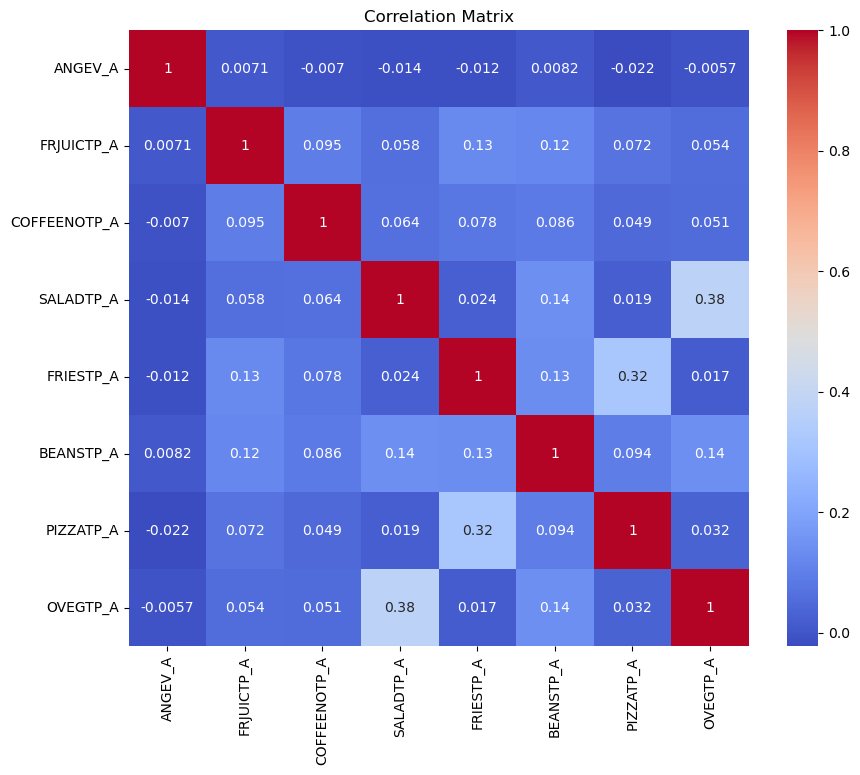

In [6]:
correlation_matrix = df_selected.corr()
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Hypothesis Testing

In [7]:
from scipy.stats import ttest_ind

heart_disease = df_selected[df_selected['ANGEV_A'] == 1]['FRJUICTP_A']
no_heart_disease = df_selected[df_selected['ANGEV_A'] == 0]['FRJUICTP_A']

t_stat, p_value = ttest_ind(heart_disease, no_heart_disease)

print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: 1.1432974401430953, P-value: 0.2529255308807975


# KNN

KNN
accuracy: 0.9828799695643904
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5168
           1       0.00      0.00      0.00        89

    accuracy                           0.98      5257
   macro avg       0.49      0.50      0.50      5257
weighted avg       0.97      0.98      0.97      5257



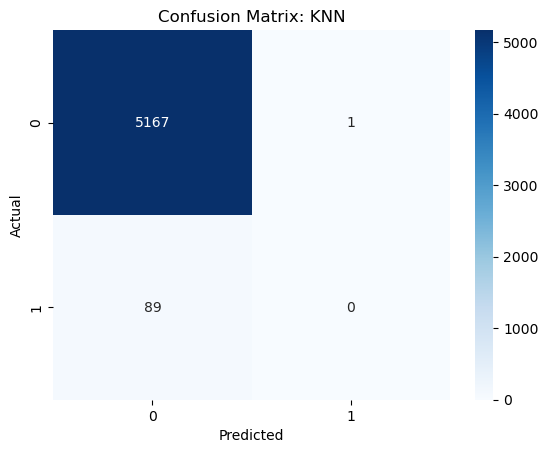

In [8]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("KNN")
print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred, zero_division=1))

plot_confusion_matrix(y_test, y_pred, 'KNN')

# K-means

K-means
accuracy: 0.4146851816625452
              precision    recall  f1-score   support

           0       0.98      0.41      0.58      5168
           1       0.02      0.57      0.03        89

    accuracy                           0.41      5257
   macro avg       0.50      0.49      0.31      5257
weighted avg       0.97      0.41      0.57      5257



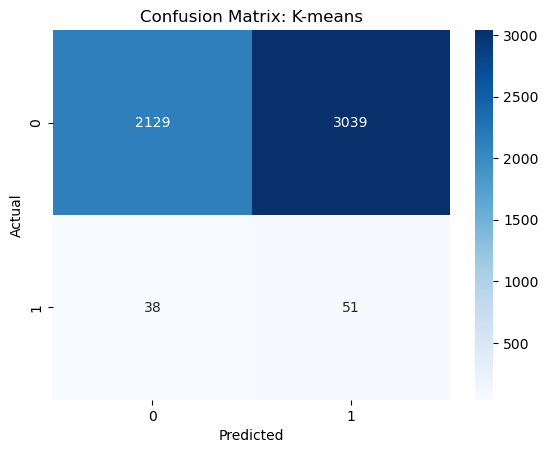

In [9]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10).fit(X_train)
y_pred = kmeans.predict(X_test)
print("K-means")
print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred, zero_division=1))

plot_confusion_matrix(y_test, y_pred, 'K-means')

# Decision Tree

Decision Tree
accuracy: 0.9786950732356857
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5168
           1       0.04      0.01      0.02        89

    accuracy                           0.98      5257
   macro avg       0.51      0.50      0.50      5257
weighted avg       0.97      0.98      0.97      5257



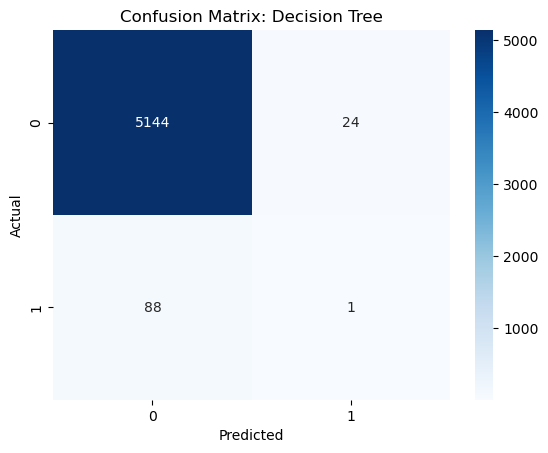

In [10]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Decision Tree")
print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred, zero_division=1))
plot_confusion_matrix(y_test, y_pred, 'Decision Tree')

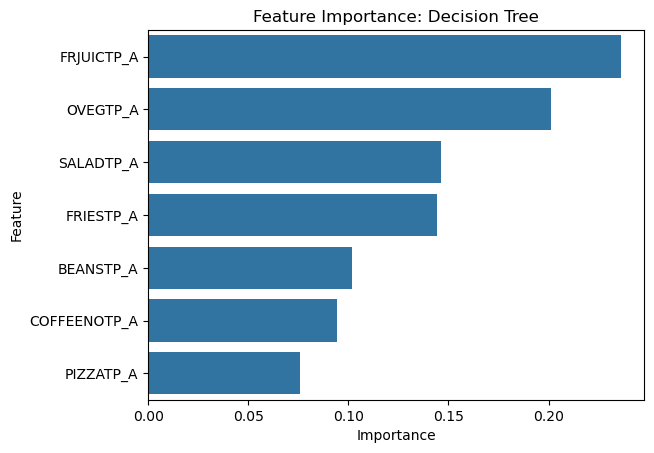

In [11]:
dt_importances = dt.feature_importances_
dt_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': dt_importances})
plot_feature_importance(dt_importance_df, 'Decision Tree')

# Random Forest

Random Forest
accuracy: 0.9809777439604337
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5168
           1       0.08      0.01      0.02        89

    accuracy                           0.98      5257
   macro avg       0.53      0.50      0.51      5257
weighted avg       0.97      0.98      0.97      5257



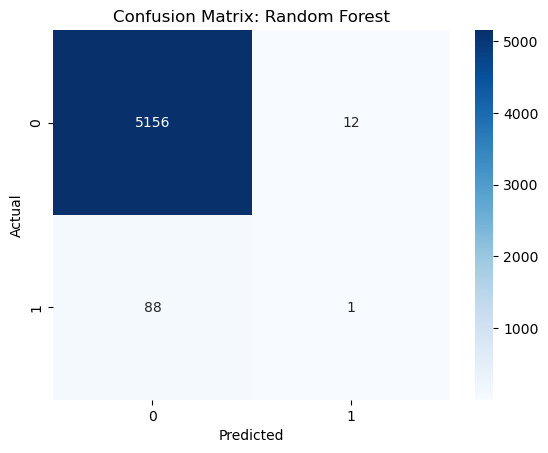

In [12]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Random Forest")
print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred, zero_division=1))
plot_confusion_matrix(y_test, y_pred, 'Random Forest')

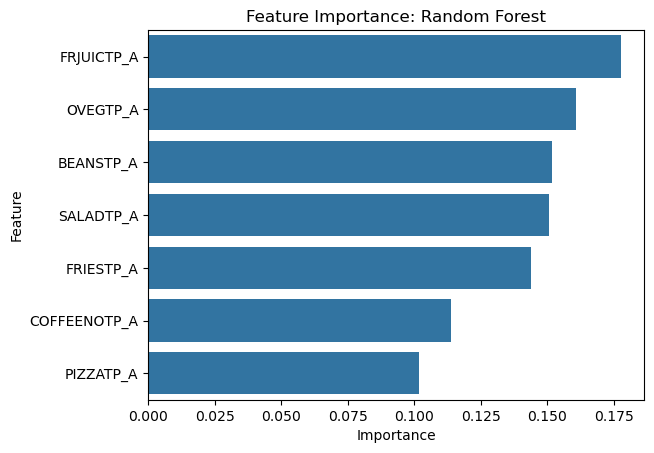

In [13]:
rf_importances = rf.feature_importances_
rf_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_importances})
plot_feature_importance(rf_importance_df, 'Random Forest')

# CatBoost

CatBoost
accuracy: 0.9817386342020163
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5168
           1       0.00      0.00      0.00        89

    accuracy                           0.98      5257
   macro avg       0.49      0.50      0.50      5257
weighted avg       0.97      0.98      0.97      5257



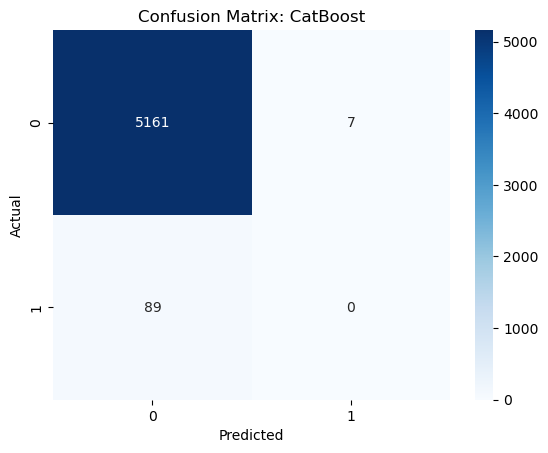

In [14]:
catboost = CatBoostClassifier(verbose=0)
catboost.fit(X_train, y_train)
y_pred = catboost.predict(X_test)
print("CatBoost")
print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred, zero_division=1))
plot_confusion_matrix(y_test, y_pred, 'CatBoost')

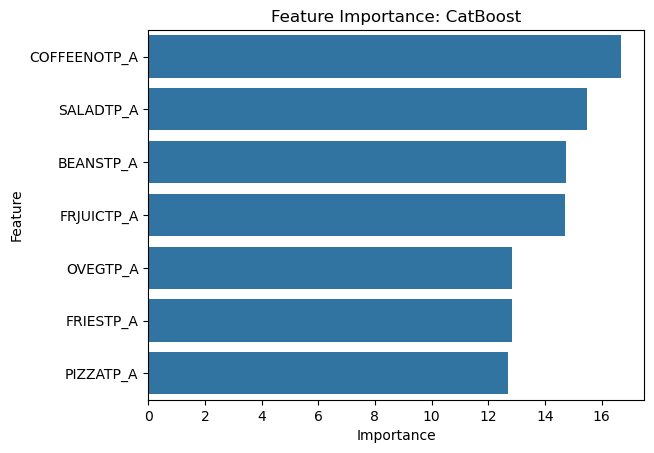

In [15]:
catboost_importances = catboost.get_feature_importance()
catboost_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': catboost_importances})
plot_feature_importance(catboost_importance_df, 'CatBoost')

# Logistic Regression

        Feature  Coefficient Correlation
4     BEANSTP_A     0.096106    Positive
0    FRJUICTP_A     0.051193    Positive
6      OVEGTP_A     0.004503    Positive
1  COFFEENOTP_A    -0.051571    Negative
3     FRIESTP_A    -0.072897    Negative
2     SALADTP_A    -0.151024    Negative
5     PIZZATP_A    -0.193653    Negative


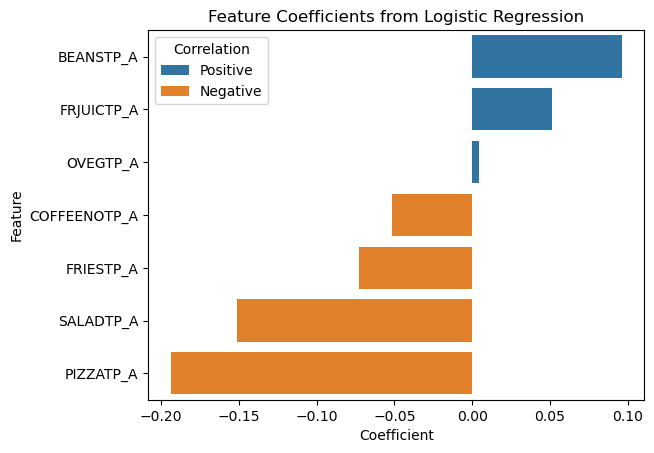

In [16]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
coefficients = log_reg.coef_[0]
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
coef_df['Correlation'] = coef_df['Coefficient'].apply(lambda x: 'Positive' if x > 0 else 'Negative')
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
print(coef_df.sort_values(by='Coefficient', ascending=False))
sns.barplot(x='Coefficient', y='Feature', hue='Correlation', data=coef_df)
plt.title('Feature Coefficients from Logistic Regression')
plt.show()